In [3]:
#installing necessary libraries
!pip install librosa matplotlib pandas numpy

# importing the libraries
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
from IPython.display import Audio


In [4]:
#uploading Dataset.zip
uploaded = files.upload()

#unzipping the dataset
!unzip -q "Dataset.zip" -d Dataset
print("Dataset unzipped successfully!")


Saving Dataset.zip to Dataset.zip
Dataset unzipped successfully!


In [5]:
#scanning dataset and extracting info
data = []

for root, _, files_list in os.walk("Dataset"):
    for f in files_list:
        if f.lower().endswith((".wav", ".mp3", ".flac", ".ogg")):
            path = os.path.join(root, f)  # Full path to file

            # labelling rule: if "real" is in filename, "real". Otherwise, "fake"
            label = "real" if "real" in f.lower() else "fake"

            try:
                y, sr = librosa.load(path, sr=None)  #loading audio
                duration = librosa.get_duration(y=y, sr=sr)  # Duration in seconds
                data.append([f, path, label, sr, duration])
            except Exception as e:
                print("Skipping file:", f, "| Error:", e)

#creating DataFrame
df = pd.DataFrame(data, columns=["Filename", "Path", "Label", "SampleRate", "Duration"])

print("Dataset loaded successfully!")
print("Total audio files found:", len(df))
print(df["Label"].value_counts())  #shows how many real/fake files
df.head()

Dataset loaded successfully!
Total audio files found: 48
Label
fake    42
real     6
Name: count, dtype: int64


,Filename,Path,Label,SampleRate,Duration
0,Moving motor vehicle_ata-audioldm2.wav,Dataset/Dataset/Moving motor vehicle_ata-audio...,fake,16000,4.0
1,unsteady table causes dishes to clatter and wo...,Dataset/Dataset/unsteady table causes dishes t...,fake,16000,4.0
2,"residential area, birds singing, traffic hum a...","Dataset/Dataset/residential area, birds singin...",fake,16000,4.0
3,"residential area, birds singing, traffic hum a...","Dataset/Dataset/residential area, birds singin...",fake,16000,4.0
4,unsteady table causes dishes to clatter and wo...,Dataset/Dataset/unsteady table causes dishes t...,fake,16000,4.0


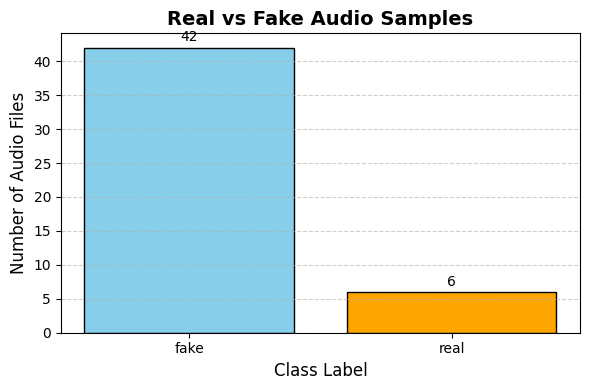

In [6]:
#plotting Real vs Fake class distribution
import matplotlib.pyplot as plt

#counting how many real vs fake
label_counts = df["Label"].value_counts()

#plotting
plt.figure(figsize=(6,4))
bars = plt.bar(label_counts.index, label_counts.values, color=["skyblue", "orange"], edgecolor="black")

#adding value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

#titles and labels
plt.title("Real vs Fake Audio Samples", fontsize=14, fontweight='bold')
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Number of Audio Files", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



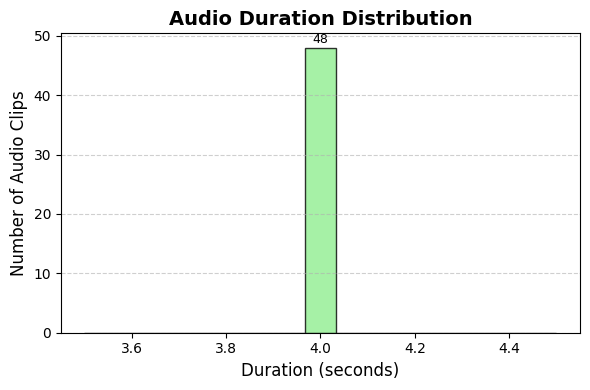

In [7]:
#plotting Audio Duration Distribution
import matplotlib.pyplot as plt

#plotting Audio Duration Distribution
df = df.dropna(subset=["Duration"])

#plotting histogram
plt.figure(figsize=(6,4))
n, bins, patches = plt.hist(df["Duration"], bins=15, color="lightgreen", edgecolor="black", alpha=0.8)

#adding value labels on top of bars (optional)
for i in range(len(patches)):
    if n[i] > 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, n[i] + 0.2, int(n[i]),
                 ha='center', va='bottom', fontsize=9)

#titles and labels
plt.title("Audio Duration Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Number of Audio Clips", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [8]:
#defining spectrogram plotting function
import librosa, librosa.display, numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import os

def plot_spectrogram(y, sr, title):
    """Display a simple frequency–time spectrogram."""
    plt.figure(figsize=(8, 3))
    spec = librosa.stft(y)
    spec_db = librosa.amplitude_to_db(np.abs(spec))
    librosa.display.specshow(spec_db, sr=sr, x_axis="time", y_axis="hz", cmap="magma")
    plt.colorbar(format="%+2.f dB")
    plt.title(title, fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.show()


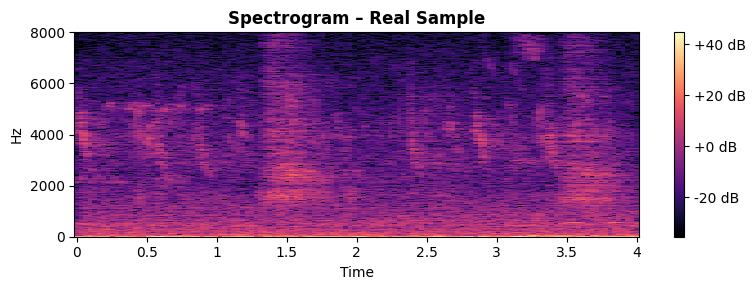

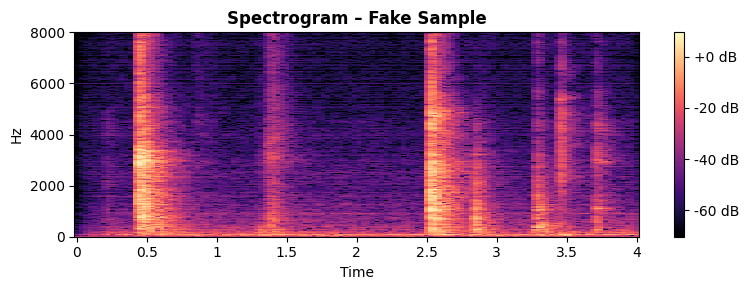

In [9]:
#picking up one real and one fake example
real_files = df[df["Label"] == "real"]["Path"].tolist()
fake_files = df[df["Label"] == "fake"]["Path"].tolist()

#plotting and playing examples
if real_files:
    y_real, sr_real = librosa.load(real_files[3], sr=None)
    plot_spectrogram(y_real, sr_real, "Spectrogram – Real Sample")
    display(Audio(y_real, rate=sr_real))

if fake_files:
    y_fake, sr_fake = librosa.load(fake_files[35], sr=None)
    plot_spectrogram(y_fake, sr_fake, "Spectrogram – Fake Sample")
    display(Audio(y_fake, rate=sr_fake))


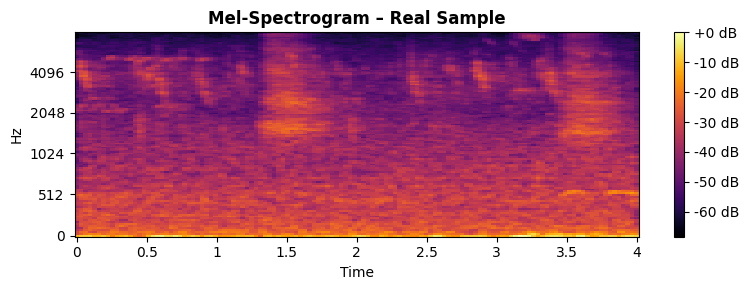

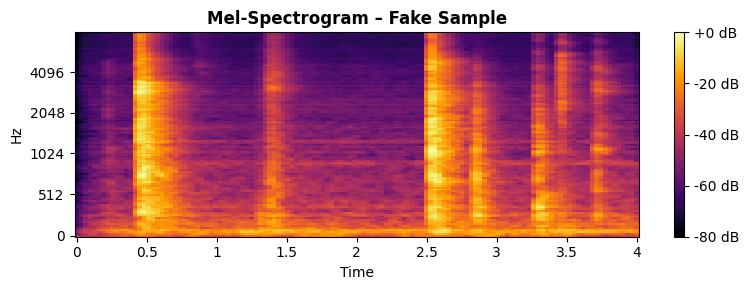

In [10]:
#defining Mel-Spectrogram plotting function
def plot_mel(y, sr, title):
    """Display Mel-scaled spectrogram for richer frequency detail."""
    plt.figure(figsize=(8, 3))
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    librosa.display.specshow(mel_db, sr=sr, x_axis="time", y_axis="mel", cmap="inferno")
    plt.colorbar(format="%+2.f dB")
    plt.title(title, fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.show()

#plotting for one real & one fake sample
if real_files:
    plot_mel(y_real, sr_real, "Mel-Spectrogram – Real Sample")
if fake_files:
    plot_mel(y_fake, sr_fake, "Mel-Spectrogram – Fake Sample")


All plots saved inside 'plots/' folder!


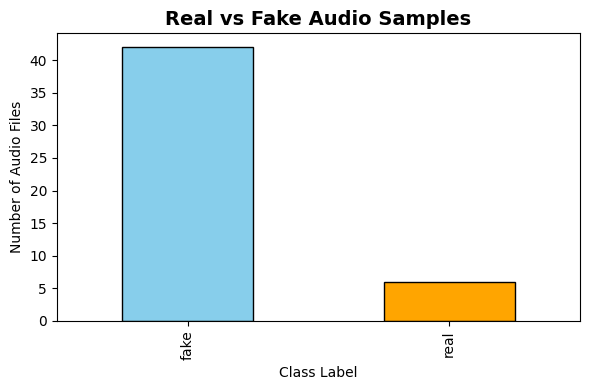

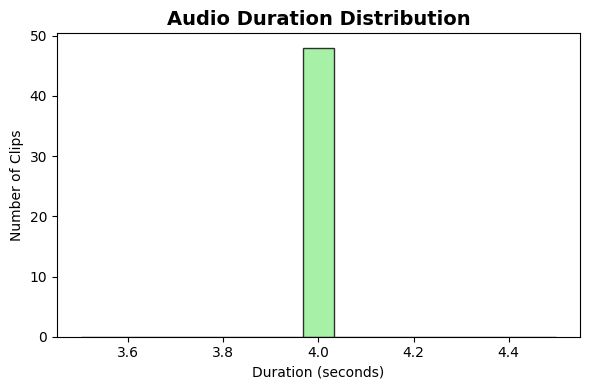

In [11]:
#saving example plots to 'plots/' folder
os.makedirs("plots", exist_ok=True)

# 1. Real vs Fake bar chart
plt.figure(figsize=(6,4))
df["Label"].value_counts().plot(kind="bar", color=["skyblue","orange"], edgecolor="black")
plt.title("Real vs Fake Audio Samples", fontsize=14, fontweight="bold")
plt.xlabel("Class Label"); plt.ylabel("Number of Audio Files")
plt.tight_layout()
plt.savefig("plots/real_vs_fake.pdf")

# 2. Audio Duration histogram
plt.figure(figsize=(6,4))
plt.hist(df["Duration"], bins=15, color="lightgreen", edgecolor="black", alpha=0.8)
plt.title("Audio Duration Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Duration (seconds)"); plt.ylabel("Number of Clips")
plt.tight_layout()
plt.savefig("plots/duration_histogram.pdf")

print("All plots saved inside 'plots/' folder!")
